In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Activation:
    @staticmethod
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))

    @staticmethod
    def softmax(z):
        return np.exp(z) / np.exp(z).sum()

In [3]:
class Loss:
    def log(Y,A):
        return Y * np.log(A) + (1 - Y) * np.log(1 - A)

##Implementation
An XNOR gate has the following logic:

<img src="https://www.electronics-tutorial.net/wp-content/uploads/2015/08/XNOR1.png" align="center"/>

# Notation
\begin{gathered}
    \Theta = \begin{bmatrix}
    \theta^{(1)} & \theta^{(2)}
    \end{bmatrix}\\
    A=\begin{bmatrix}
    a^{(1)} & a^{(2)} & a^{(3)}
    \end{bmatrix}\\
    \Delta=\begin{bmatrix}
    \delta^{(1)} & \delta^{(2)} & \delta^{(3)}
    \end{bmatrix}\\
    a^{(L)} = \text{Output layer}\\\\
\end{gathered}
#### First we feed the input into $a^{(1)}$
# Feedforward
#### To feedforward, we pass the weighted sum into the Sigmoid activation function:

\begin{gathered}
    \sigma(\sum_{i=0}^{S_l}\sum_{j=1}^{S_{l+1}}a_{i}^{(l)}\theta_{ji}^{(l)}) = \sigma(\Theta^{(l)}A^{(l)})
\end{gathered}

#### After feeding forward for training example $x^{(t)}$, we now perform backpropagation by calculating error for each layer:

#Backpropagation
The error for layer $l$ is calculated as:
\begin{gathered}
    \frac{\partial J(\Theta)}{\partial\Theta^{(l)}} = 
    \frac{\partial J(\Theta)}{\partial a^{(l)}}
    \frac{\partial a^{(l)}}{\partial z^{(l)}}
    \frac{\partial z^{(l)}}{\partial \Theta^{(l)}}\\\\
\end{gathered}
#### Without going too much into detail, the formula for the error in layer $l$ is:


\begin{gathered}
    \text{for }0...L:\\
    \delta^{(l)}=\begin{cases}
        y^{(t)} - a^{(L)}, \text{if }l = L\\
        ((\Theta^{(l)})^T \delta^{(l + 1)}) \circ a^{(l)}
    \circ (1 - a^{(l)}), \text{if }l < L - 2
        \end{cases}
\end{gathered}

#### After calculating the error, we can update the weights with the following:

$
    \begin{gathered}
        \Theta^{(l)}:=\Theta^{(l)} - \alpha \frac{\partial J(\Theta)}{\partial \Theta^{(l)}}\equiv \Theta^{(l)} - \frac{\alpha}{m} a^{(l)}\delta^{(l)}
    \end{gathered}

#### To update biases, the following update rule is performed:

\begin{gathered}
    \Theta_b^{(l)}:= \Theta_b^{(l)} - \frac{\alpha}{m}1 \cdot \delta^{(l + 1)}$
\end{gathered}


In [255]:
train_x = np.array([[1,0],[0,0],[0,1],[1,1]])
train_y = np.array([0,1,0,1])
m = len(train_x)

layers = [3,3,1]
L = len(layers) - 1
thetaVec = [np.random.rand(layers[x + 1],layers[x]) for x in range(L)]
A = [np.zeros((V,1)) for V in layers]
deltaVec = A.copy()

cost_hist = []
grad = []

In [203]:
def feedforward(X,epsilon = 0):
    A[0][1:] = X.reshape((len(X),1))
    for l in range(L):
        A[l + 1] = Activation.sigmoid((thetaVec[l] + epsilon) @ A[l])
    return A[L].sum()

In [228]:
def calc_error(y):
    for l in range(L,0,-1):
        if l == L:
            deltaVec[l] = A[L] - y
        else:
            deltaVec[l] = thetaVec[l].T @ deltaVec[l + 1] * A[l] * (1 - A[l])

In [57]:
def J(m,net_loss):
    return ((-1 / m) * net_loss).sum()

In [194]:
def check_gradient(x,y,epsilon):
    feedforward(x,epsilon)
    j_plus_loss = Loss.log(y,A[L])
    j_plus = J(m,j_plus_loss)

    feedforward(x,-epsilon)
    j_minus_loss = Loss.log(y,A[L])
    j_minus = J(m,j_minus_loss)

    return (j_plus - j_minus) / (2 * epsilon)

In [254]:
def train(lr,epochs,calc_cost = False,check_grad = False,epsilon = 0):
    global thetaVec,grad,A
    n_epochs = 0
    while n_epochs < epochs:
        net_loss = 0
        if check_grad:
            grad.append(check_gradient(train_x[0],train_y[0],epsilon))

        for x,y in zip(train_x,train_y):
            feedforward(x)
            calc_error(y)

            if calc_cost:
                net_loss += Loss.log(y,A[L])

            for l in range(L):
                if l < L - 2:
                    thetaVec[l] -= (lr / m) * (deltaVec[l + 1] @ A[l].T)
                else:
                    thetaVec[l] -= (lr / m) * (deltaVec[l + 1] * A[l].T)
                thetaVec[l][:,0] -= (lr / m) * deltaVec[l + 1].sum()

        n_epochs += 1
        if calc_cost:
            cost_hist.append(J(m,net_loss))

In [260]:
def predict(X):
    feedforward(X)
    return [X,int(A[L].sum() > 0.5),A[L].sum()]

In [256]:
train(1e-2,100000,check_grad = True,calc_cost = True,epsilon = 1e-4)

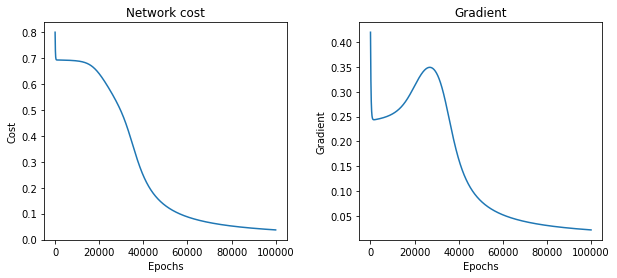

In [317]:
x_axis = [cost_hist,grad]
y_label = ["Cost","Gradient"]
title = ["Network cost","Gradient"]

fig = plt.figure(figsize=(10,4))
for i,y in enumerate(y_label):
    fig.subplots_adjust(wspace=0.3)
    fig.add_subplot(1,2,i + 1)
    plt.xlabel("Epochs")
    plt.ylabel(y)
    plt.title(title[i])
    plt.plot(x_axis[i])

In [261]:
for x in train_x:
    print(predict(x))

[array([1, 0]), 0, 0.03868189877981739]
[array([0, 0]), 1, 0.934707086861418]
[array([0, 1]), 0, 0.028048266153840578]
[array([1, 1]), 1, 0.9874319451063889]
